# Studentnumber: 112050 {-}

# Exercise 1 {-}

#### Sharpening 

In order to start sharpening the image soccerteam.jpg we first need to read the image in python so that we may operate on it. There are many different libraries in order to this but we will use the skimage library. The image is read as a 3d array where each element reprensents a pixel value that ranges from 0 to 255.

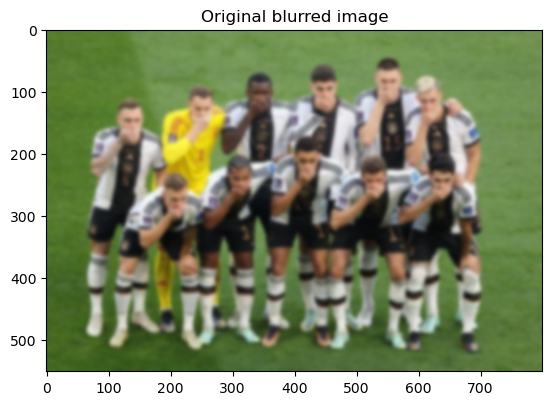

In [2]:
%matplotlib inline
from skimage import io # Used for reading
import matplotlib.pyplot as plt # Used for plotting

soccer_image = io.imread("soccerteam.tif") # Reads the image
plt.title("Original blurred image")
plt.imshow(soccer_image) # Shows the image

#### Unsharp mask (um)

The um method is a linear image processing technique that sharpens the image. The enhanced image is the difference between the original image and its blurred version multiplied by and amount and added back to the original image. It can be summarized by the following formula:

$$
I_E = I + \alpha (I-I_B)
$$

Where $I_E$ is the new enhanced image, $I$ is the original image, $\alpha$ is the scale amount and $I_B$ is the blurred version. Blurring can be done using many different filters such as e.g. median filter, but  Gaussian is the most common.

Below I have made a simple function in python where the above equation is implemented.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


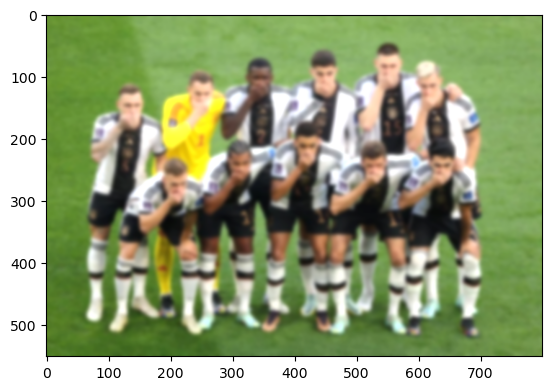

In [3]:
from skimage.filters import gaussian 
import numpy as np

def unsharp_masking(image, amount, sig):
    blur_image = gaussian(image, sigma=sig, channel_axis=True)
    enhanced_image = image + amount*(image-blur_image)
    return enhanced_image.astype(int)


amount = 0.2
sig = 5

um = unsharp_masking(soccer_image, amount, sig)
plt.imshow(um, vmin=0, vmax=1)

The function did not seem to give that good results other than the fact that it increased some of the lighting in the image. Many other amount and sigma values where used but this is the best one.

Luckily skimage has its own unsharp_mask method which is far better. Below is code used. 

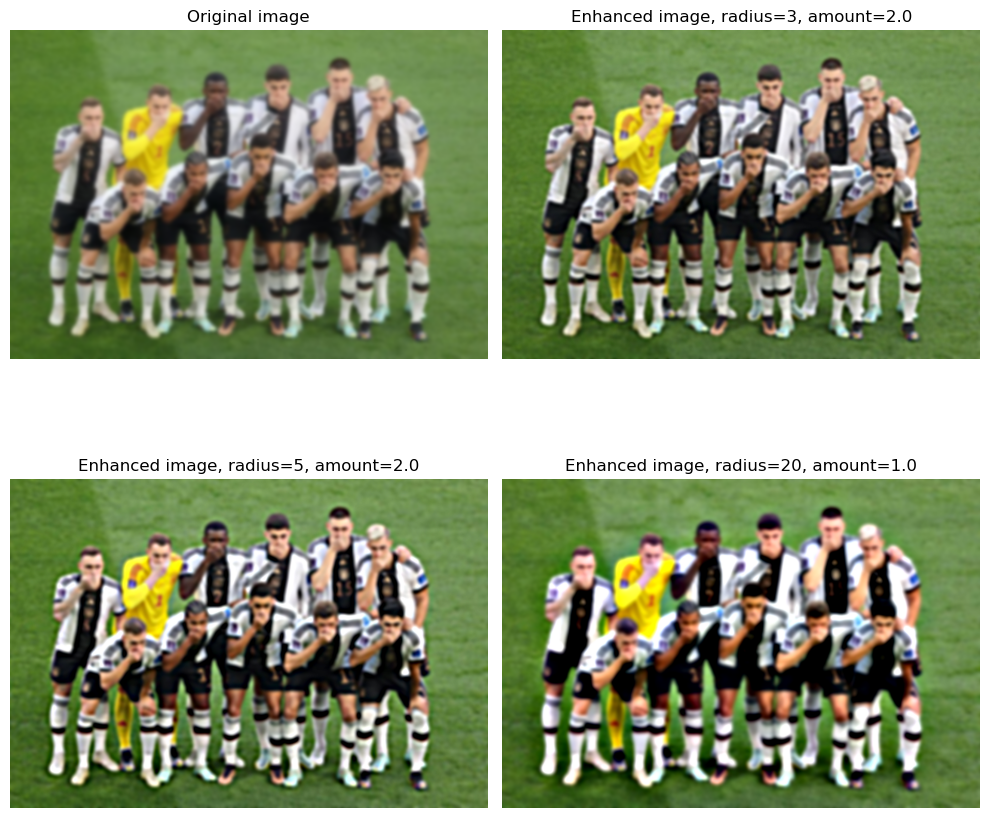

In [5]:
from skimage.filters import unsharp_mask

result_1 = unsharp_mask(soccer_image, radius=3, amount=2)
result_2 = unsharp_mask(soccer_image, radius=5, amount=2)
result_3 = unsharp_mask(soccer_image, radius=20, amount=1)

fig, axes = plt.subplots(nrows=2, ncols=2,
                         sharex=True, sharey=True, figsize=(10, 10))
ax = axes.ravel()

ax[0].imshow(soccer_image)
ax[0].set_title('Original image')
ax[1].imshow(result_1)
ax[1].set_title('Enhanced image, radius=3, amount=2.0')
ax[2].imshow(result_2)
ax[2].set_title('Enhanced image, radius=5, amount=2.0')
ax[3].imshow(result_3)
ax[3].set_title('Enhanced image, radius=20, amount=1.0')

for a in ax:
    a.axis('off')
fig.tight_layout()
plt.show()

As can be seen the image is a lot less blurry using the unsharp_mask from skimage instead. It seems like the best two images are the ones where the:

$$
radius = 3, amount = 2
$$
$$
radius = 5, amount = 2
$$

The one with $radius = 20$ and $amount = 1$ is a little to bright and exposes to much of its blurriness in my opinion and does not look that presentable.

#### Canny filter

Canny filter is a multi staged edge detector belonging to the category of gradientfilters as it is based on the derivative of a Gaussian filtered image to compute the intensity of the gradients. In this filter operation the Gaussian reduces the effect of noise in the image and potential edges are thinned down 1-pixel by removing the non-maximum pixels of the gradient magnitude. 

#### Blurred

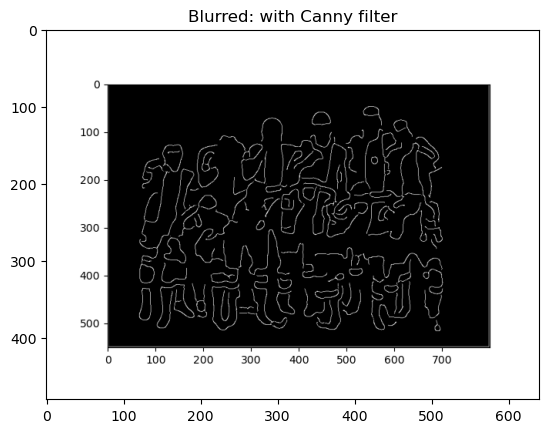

In [4]:
# I displayed the image in python because there were some issues with pasting it into this pdf document
blurry_canny = io.imread('edges3.png')
plt.title("Blurred: with Canny filter")
plt.imshow(blurry_canny)

Based on the fact that there are not that many strong edges in this picture, I would say that this is the blurred image because in blurred images the contours are not that visible. And hence when the canny filter was applied this was result.

#### Sharpened

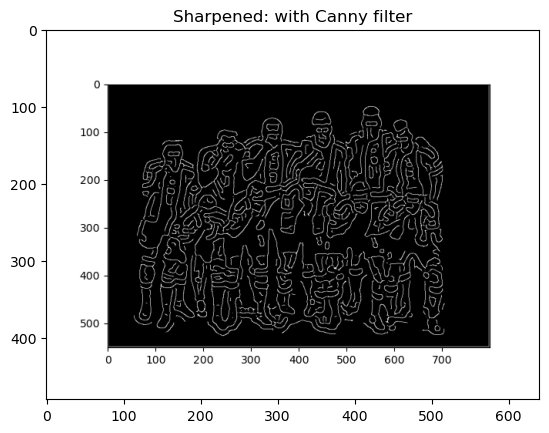

In [5]:
# I displayed the image in python because there were some issues with pasting it into this pdf document
blurry_sharpy = io.imread('edges4.png')
plt.title("Sharpened: with Canny filter")
plt.imshow(blurry_sharpy)

This is the sharpened image with a canny filter applied. Here the lines are more well defined and the edges are more visible. This has to be the sharpened version.

To apply the canny filter we may use the canny edge detector from skimage. But first we need to convert the image from RGB to gray scale and then apply the canny edge detector. The code below applies the canny filter on the blurred image.

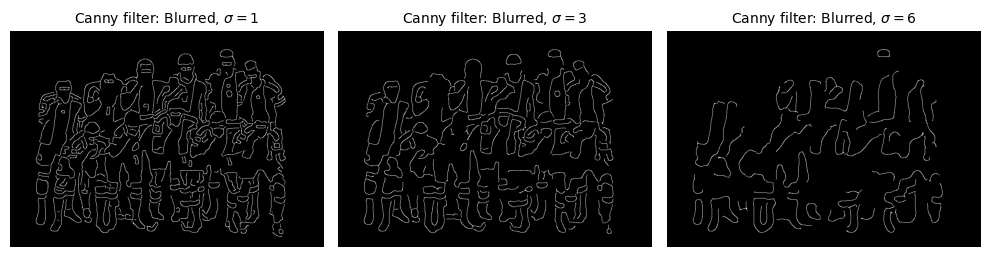

In [6]:
from skimage import feature
from skimage.color import rgb2gray

# Converting the blurred and the our sharpened image to grayscale
gray_scale_blurred = rgb2gray(soccer_image)

# Applying canny filter with 3 different sigma values on blurred image
canny_image_blurr1 = feature.canny(gray_scale_blurred, 1)
canny_image_blurr3 = feature.canny(gray_scale_blurred, 3)
canny_image_blurr6 = feature.canny(gray_scale_blurred, 6)

fig, ax = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=True, figsize=(10, 10))
ax[0].imshow(canny_image_blurr1, cmap='gray')
ax[0].set_title(r'Canny filter: Blurred, $\sigma=1$', fontsize=10)

ax[1].imshow(canny_image_blurr3, cmap='gray')
ax[1].set_title(r'Canny filter: Blurred, $\sigma=3$', fontsize=10)

ax[2].imshow(canny_image_blurr6, cmap='gray')
ax[2].set_title(r'Canny filter: Blurred, $\sigma=6$', fontsize=10)

for a in ax:
    a.axis('off')
fig.tight_layout()
plt.show()

Here we see that when $\sigma = 3$ for the canny filter applied on our sharpened image we get the same image at the top in figure 2 of the task. This further proves that it must be the blurred image.

Now on the we may do the same for the sharpened image.

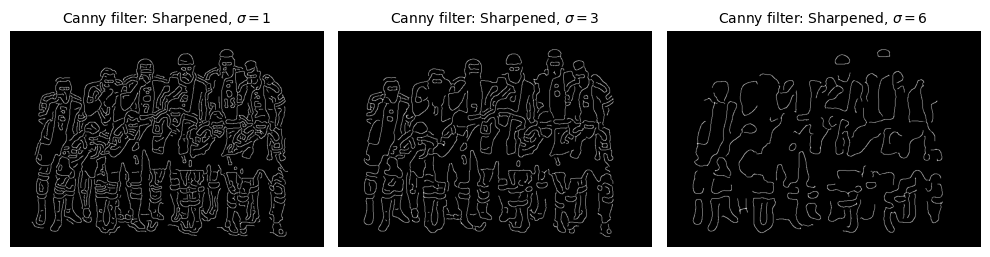

In [7]:
# The one from previous exercise assigned to another variable for convinience
sharpened_image = result_1

# Converting the blurred and the our sharpened image to grayscale
gray_scale_sharp = rgb2gray(sharpened_image)

#  Applying canny filter with 3 different sigma values on sharpened image
canny_image_sharp1 = feature.canny(gray_scale_sharp, 1)
canny_image_sharp3 = feature.canny(gray_scale_sharp, 3)
canny_image_sharp6 = feature.canny(gray_scale_sharp, 6)

fig, ax = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=True, figsize=(10, 10))
ax[0].imshow(canny_image_sharp1, cmap='gray')
ax[0].set_title(r'Canny filter: Sharpened, $\sigma=1$', fontsize=10)

ax[1].imshow(canny_image_sharp3, cmap='gray')
ax[1].set_title(r'Canny filter: Sharpened, $\sigma=3$', fontsize=10)

ax[2].imshow(canny_image_sharp6, cmap='gray')
ax[2].set_title(r'Canny filter: Sharpened, $\sigma=6$', fontsize=10)

for a in ax:
    a.axis('off')
fig.tight_layout()
plt.show()

Here we see that when $\sigma = 1$ for the canny filter applied on our sharpened image gives us the same image at the bottom shown in figure 2 of the task. This further proves that it must be the sharpened image.

#### Key observations from application of the canny filter 

The key observations that are most obvious is the fact that the edges gets less defined as the sigma value increases. Hence it could be really hard to tell if the canny filter was applied on a blurry image or an sharpened image. Because larger sigma values could make it look like it was applied on a blurry image.

# Exercise 2 {-}

It is possible to remove the background from the image and having the coffeebeans and cloves including their shadows remaining. This can be done with the following steps:

* Threshold e.g otsu, Yen etc.
* Generate masks which identifes the foreground objects
* Combine the masks to create a single mask

We start of by reading the image coffeebeans.jpg so that we may operate on it.

Text(0.5, 1.0, 'Original coffeebeans.jpg image')

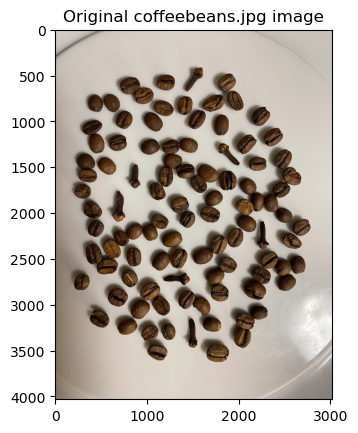

In [8]:
# Reads the image and shows it  
coffee_image = io.imread("coffeebeans.jpg")
plt.imshow(coffee_image)
plt.title("Original coffeebeans.jpg image")

#### Thresholding

Thresholding is a segmentation technique that is used in order to identify the foreground from the background. The threshold is then used to convert the images from grayscale to binary. 

There are several different thresholding techniques that may be used to this e.g otsu, Yen etc. For this exercise I will use the otsu method from the skimage library which is among the most popular ones out there.

First we may apply the otsu threshold on all channels of the image as this is an RGB image. 

In [9]:
from skimage import filters

# Otsu threshold for each channel
red_threshold = filters.threshold_otsu(coffee_image[:,:,0])
green_threshold = filters.threshold_otsu(coffee_image[:,:,1])
blue_threshold = filters.threshold_otsu(coffee_image[:,:,2])

print("Threshold values for RGB image coffeebeans.jpg using Otsu method")
print(f'th_red = {red_threshold}, th_green = {green_threshold}, th_blue = {blue_threshold}')

Threshold values for RGB image coffeebeans.jpg using Otsu method
th_red = 137, th_green = 122, th_blue = 109


#### Mask

Next we create a mask for each of the channels. This will make sure that all objects are identified in each channel.

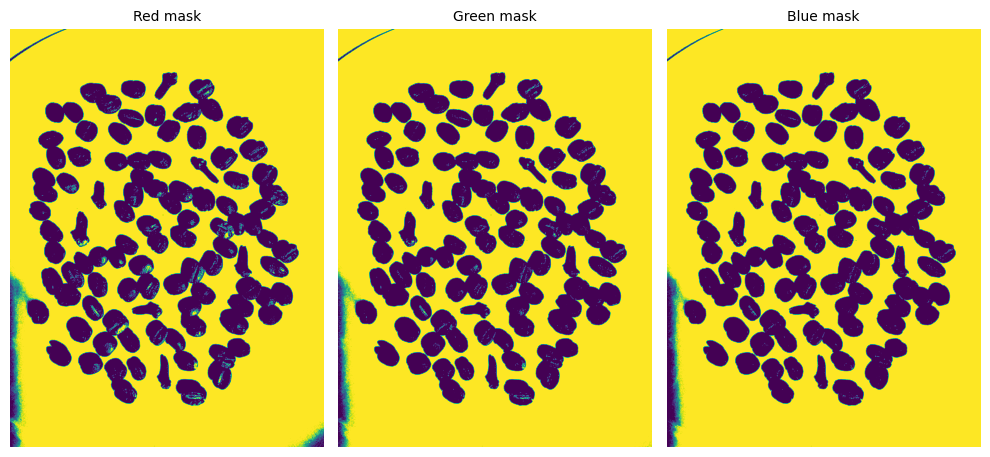

In [10]:
# Create masks that identify the foreground objects in each channel
red_mask = coffee_image[:,:,0] > red_threshold
green_mask = coffee_image[:,:,1] > green_threshold
blue_mask = coffee_image[:,:,2] > blue_threshold

fig, ax = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=True, figsize=(10, 10))
ax[0].imshow(red_mask)
ax[0].set_title(r'Red mask', fontsize=10)

ax[1].imshow(green_mask)
ax[1].set_title(r'Green mask', fontsize=10)

ax[2].imshow(blue_mask)
ax[2].set_title(r'Blue mask', fontsize=10)

for a in ax:
    a.axis('off')
fig.tight_layout()
plt.show()

Finally we combine the image and use the mask in order to remove the background by setting the value for all three channels to 255 which is white. 

Text(0.5, 1.0, 'Image with background removed')

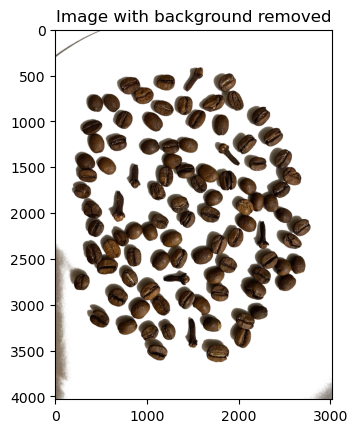

In [11]:
# Combine the masks to create a single mask that identifies the foreground objects
mask = red_mask & green_mask & blue_mask

# Use the mask to remove the background from the image
coffee_image[mask] = [255, 255, 255]

plt.imshow(coffee_image)
plt.title("Image with background removed")

#### Removing shadows

In order to remove the shadows in the image we may repeat the same process with just a few extra steps in the begining. We start of by reading the image as usual. Then I will resize the image because I want to rescale the intesity of the image in order to eliminate the shadows. The resizing is done due to the fact some of the functions in skimage are very computationally expensive and it would take alot of time to operate on a larger image.

Text(0.5, 1.0, 'Original')

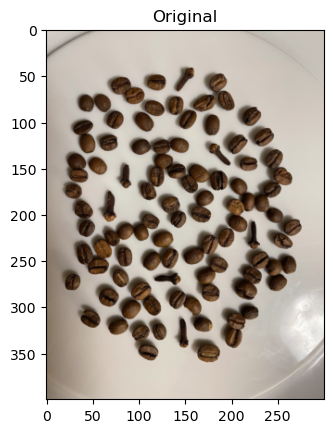

In [12]:
from skimage.transform import resize

coffee_image = io.imread('coffeebeans.jpg') # Load the image
coffee_image = resize(coffee_image, (400, 300)) # resizes the image

plt.imshow(coffee_image)
plt.title("Original")

Now I want to stretch out the contrast of the image so that some of the darker areas in the image might get eliminated. This will make the image a little unclear so I will use unsharp mask in order to make it more sharpened.

Text(0.5, 1.0, 'Sharpened image')

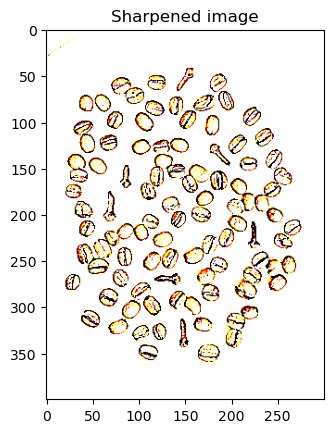

In [13]:
from skimage.exposure import rescale_intensity

# Stretch the contrast of the image
contrast_stretched_image = rescale_intensity(coffee_image, in_range='image', out_range=(0, 255))

# Apply the unsharp_mask function to the image
sharpened_image = unsharp_mask(contrast_stretched_image, radius=1, amount=5)
plt.imshow(sharpened_image)
plt.title("Sharpened image")

From here many of the same methods are the same as the one done in the previous exercise to remove the background.

In [14]:
from skimage import filters

def threshold_all_channels(image, adj_val=0):
    # Otsu threshold for each channel
    red_threshold = filters.threshold_otsu(image[:,:,0]) 
    green_threshold = filters.threshold_otsu(image[:,:,1])
    blue_threshold = filters.threshold_otsu(image[:,:,2])
    return red_threshold, green_threshold, blue_threshold

th_red, th_green, th_blue = threshold_all_channels(sharpened_image, 0.3)

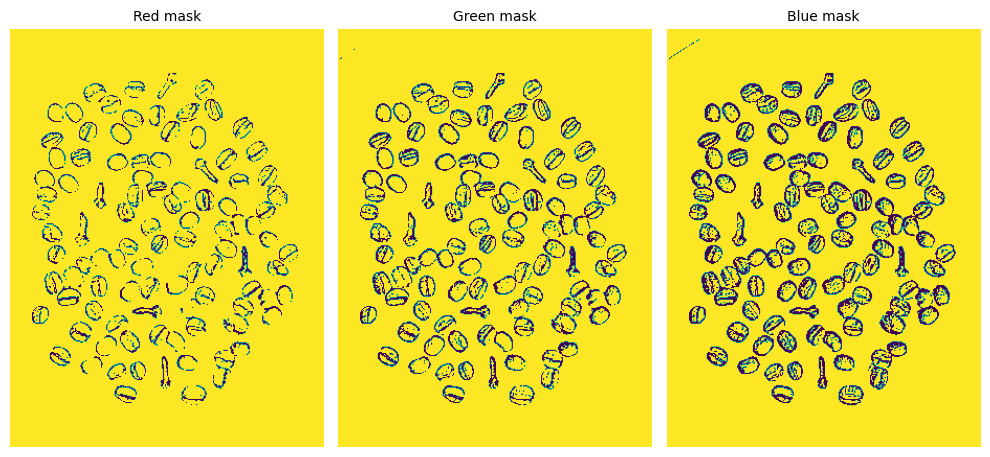

In [15]:
# Create masks that identify the foreground objects in each channel
red_mask = sharpened_image[:,:,0] > th_red
green_mask = sharpened_image[:,:,1] > th_green
blue_mask = sharpened_image[:,:,2] > th_blue

fig, ax = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=True, figsize=(10, 10))
ax[0].imshow(red_mask)
ax[0].set_title(r'Red mask', fontsize=10)

ax[1].imshow(green_mask)
ax[1].set_title(r'Green mask', fontsize=10)

ax[2].imshow(blue_mask)
ax[2].set_title(r'Blue mask', fontsize=10)

for a in ax:
    a.axis('off')
fig.tight_layout()
plt.show()

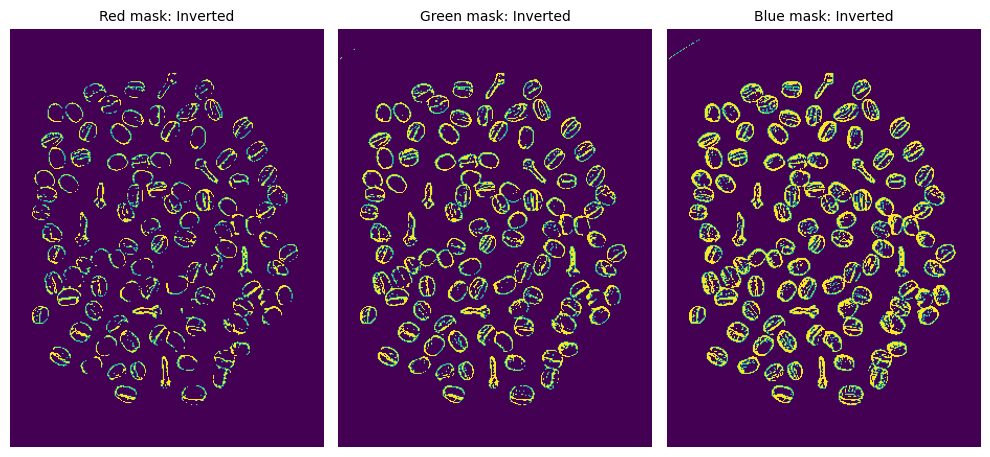

In [16]:
red_mask_inv = np.invert(red_mask)
green_mask_inv = np.invert(green_mask)
blue_mask_inv = np.invert(blue_mask)

fig, ax = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=True, figsize=(10, 10))
ax[0].imshow(red_mask_inv)
ax[0].set_title(r'Red mask: Inverted', fontsize=10)

ax[1].imshow(green_mask_inv)
ax[1].set_title(r'Green mask: Inverted', fontsize=10)

ax[2].imshow(blue_mask_inv)
ax[2].set_title(r'Blue mask: Inverted', fontsize=10)

for a in ax:
    a.axis('off')
fig.tight_layout()
plt.show()

#### Dilation

The edges are not that clear. So for each channel I will perform a dilation process in order to increase the edges and then use binary fill holes in order to fill the holes up. Dilation is a morphological technique which sets the value of a pixel to the maximum within a local neighborhood cetered about it. This will increase the size of the beans and cloves in the image.

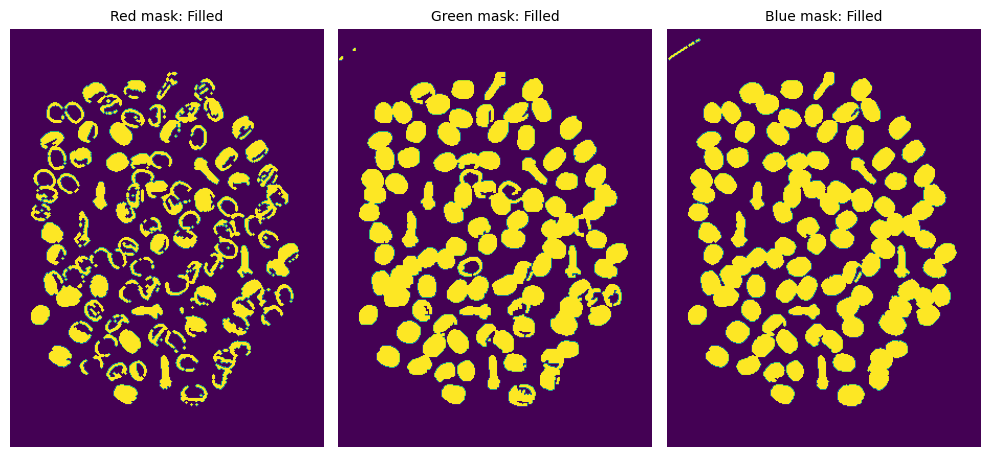

In [17]:
from skimage.morphology import dilation, disk
from scipy import ndimage as ndi

# First doing a dilation and then inverting it back
red_mask_fill = ndi.binary_fill_holes(dilation(red_mask_inv, disk(1)))
green_mask_fill = ndi.binary_fill_holes(dilation(green_mask_inv, disk(1.7)))
blue_mask_fill = ndi.binary_fill_holes(dilation(blue_mask_inv, disk(1)))

fig, ax = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=True, figsize=(10, 10))
ax[0].imshow(red_mask_fill)
ax[0].set_title(r'Red mask: Filled', fontsize=10)

ax[1].imshow(green_mask_fill)
ax[1].set_title(r'Green mask: Filled', fontsize=10)

ax[2].imshow(blue_mask_fill)
ax[2].set_title(r'Blue mask: Filled', fontsize=10)

for a in ax:
    a.axis('off')
fig.tight_layout()
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'Coffeebeans without shadows')

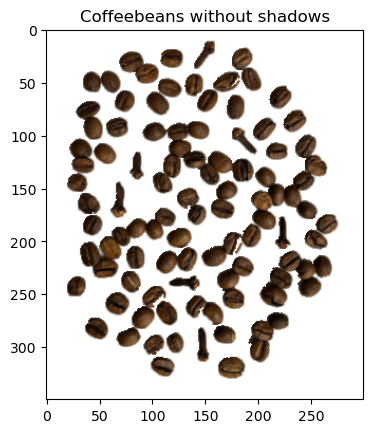

In [18]:
red_mask = np.invert(red_mask_fill)
blue_mask = np.invert(green_mask_fill)
green_mask = np.invert(blue_mask_fill)

mask = red_mask & green_mask & blue_mask
coffee_image[mask] = [255, 255, 255]
plt.imshow(coffee_image[30:380, :]) # Cropped the image 
plt.title("Coffeebeans without shadows")

Although most shadows are gone there might be a few remenants left behind. This the due to the added noise of dilation. And some of the coffee beans colors has also been taken away the result of that could be due to the rescaling of the intensity. It is possible to get these colors back by adjusting the parameters when sharpening the image.

#### Counting coffee beans

I had originally planned to do this exersice in python using skimage. But it seems like Imagej is far better and faster for this task. It is possible to this in python but it required alot of adjustments in the parameters of some function. Imagej seems to be the fastest way to solve this problem. To display the results I got in ImageJ I will use python to show the images and pandas dataframe to show the beans count.

First I will load the image into ImageJ, then I will convert it into a 8-bit image or grayscale by going to Image > Type > 8-Bit, then I threshold the image by going to the top menu selecting Image > Adjust > Threshold and the result can be seen below.

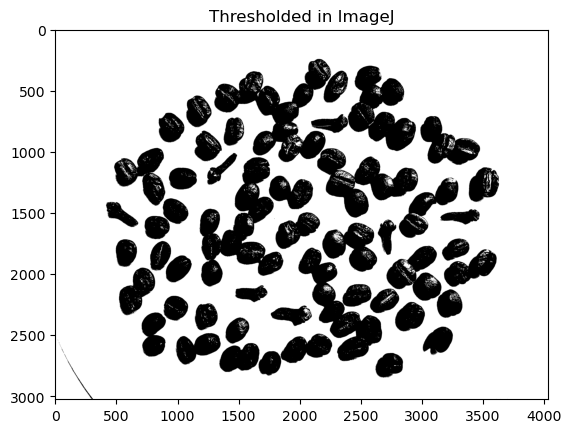

In [19]:
beansbinary = io.imread("ThresholdedBeans.tif")
plt.title("Thresholded in ImageJ")
plt.imshow(beansbinary, 'gray')

I then inverted the image and did a binary fill in order to fill the holes. To invert it Edit > Invert and to fill the holes I went to Process > Binary > Fill Holes and got the following results.

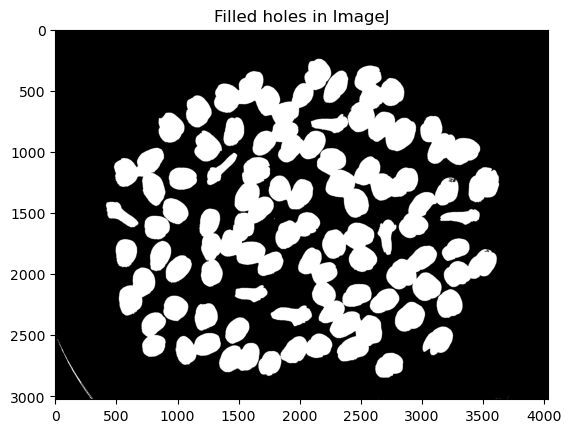

In [20]:
beansfill = io.imread("binaryfill-4.tif")
plt.title("Filled holes in ImageJ")
plt.imshow(beansfill, 'gray')

Then I carried a watershed process on the image. Which is a method that detects edges, this technique was used beacause some of the beans shadows overlap and when doing particle analysis later on in order to count the beans some of the overlapping beans may be counted as one single bean. The watershed technique will seperate the objects. To this I went to Process > Binary > Watershed and I got this result.

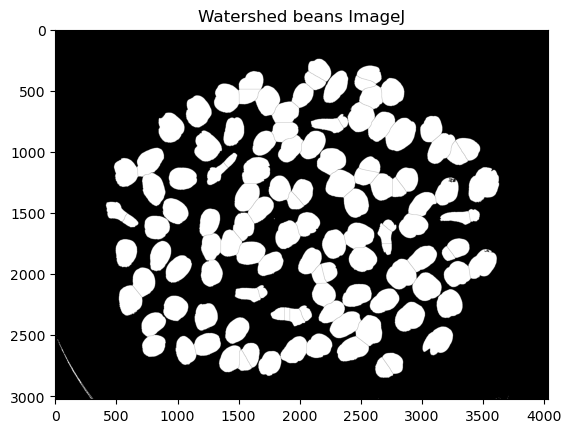

In [21]:
water_beans = io.imread("watershedOriginal.tif")
plt.title("Watershed beans ImageJ")
plt.imshow(water_beans, 'gray')

Some of the beans shadow were also counted as a single object. I adjusted those manually in ImageJ by erasing and drawing over those lines. This is of course not the ideal way to do it, but for the sake of time I will do it this way otherwise it requires some adjustment of paramenters and removing shadows as we did in python for the previous exercise. I also erased some of the shadows as well. And this was the result.

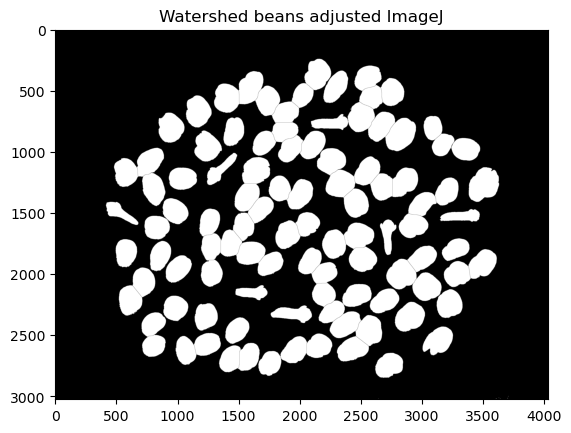

In [22]:
adjwater_beans = io.imread("watershedAdjusted.tif")
plt.title("Watershed beans adjusted ImageJ")
plt.imshow(adjwater_beans, 'gray')

The total number of beans and that I counted first by hand was 100, where 93 of the 100 where coffee beans and the remaining 7 were cloves. To count the total object in ImageJ I went to Analyze > Analyze Particles. I set the pixel size number to 100-infinity and circilarity to 0. There reults of the 100 objects in the image are presented below.

In [23]:
import pandas as pd

total_beans = pd.read_csv("Total.csv")
total_beans

Label    XM    YM
0     1  watershedAdjusted.tif  2149  2653
1     2  watershedAdjusted.tif  2557  2626
2     3  watershedAdjusted.tif  2297  2549
3     4  watershedAdjusted.tif  1598  2545
4     5  watershedAdjusted.tif  2759  2506
..  ...                    ...   ...   ...
95   96  watershedAdjusted.tif  1961   396
96   97  watershedAdjusted.tif  1586   343
97   98  watershedAdjusted.tif  1433   325
98   99  watershedAdjusted.tif  1759   290
99  100  watershedAdjusted.tif  2733   273

[100 rows x 4 columns]

And the corresponding outlines for the counted 100 objects is shown below.

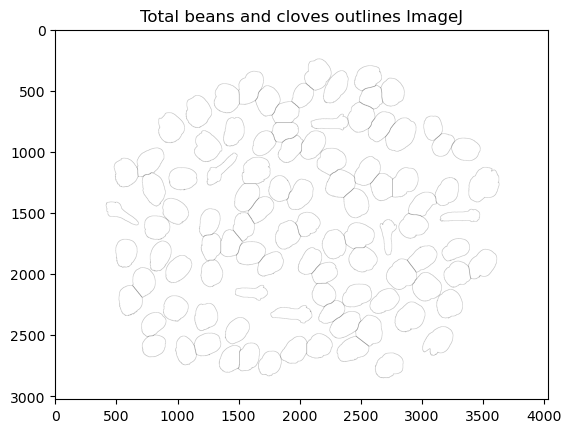

In [24]:
total = io.imread("Total.tif")
plt.title("Total beans and cloves outlines ImageJ")
plt.imshow(total, 'gray')

Then I gradually increased the circularity paramenter until the range was 0.55-1.00. Increasing the circularity parameter will make it so that only the more circular objects remain. And this will then lead to only coffee beans remaining in the counting process as the cloves are not circular in shape. I got the following results for the counted objects remaining. 

In [25]:
beans_count = pd.read_csv("beanscount.csv")
beans_count

Label    XM    YM
0    1  watershedAdjusted.tif  2149  2653
1    2  watershedAdjusted.tif  2557  2626
2    3  watershedAdjusted.tif  2297  2549
3    4  watershedAdjusted.tif  1598  2545
4    5  watershedAdjusted.tif  2759  2506
..  ..                    ...   ...   ...
88  89  watershedAdjusted.tif  1961   396
89  90  watershedAdjusted.tif  1586   343
90  91  watershedAdjusted.tif  1433   325
91  92  watershedAdjusted.tif  1759   290
92  93  watershedAdjusted.tif  2733   273

[93 rows x 4 columns]

We see that there are 93 objects in our table to verify that we only got the beans in the process we can check the corresponding outlining of the objects counted. This is shown below.

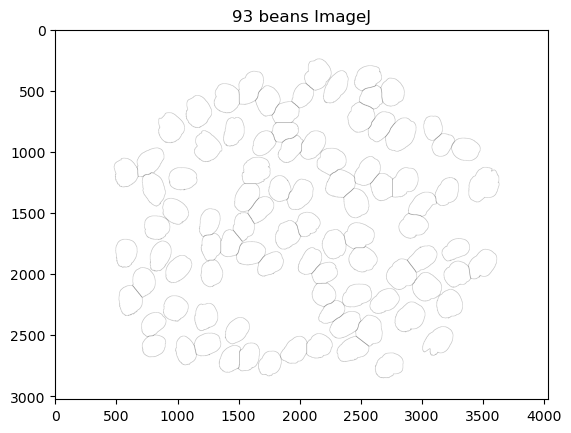

In [26]:
beans_93 = io.imread("93beans.tif")
plt.title("93 beans ImageJ")
plt.imshow(beans_93, 'gray')

And we see that only the beans were counted as the cloves are now gone.

#### x and y coordinates 

To get the x and y coordinate for each bean I went to Analyze > Set Measurements and selected Center of mass then I went to analyze again and selected measure. The result of the x and y coordinates can be seen below. 

In [27]:
xy_beans = pd.read_csv("xybeans.csv")
xy_beans[:93] # I indexed it because there was one data from the previous table which was added.

Label    XM    YM
0    1  watershedAdjusted.tif  2149  2653
1    2  watershedAdjusted.tif  2557  2626
2    3  watershedAdjusted.tif  2297  2549
3    4  watershedAdjusted.tif  1598  2545
4    5  watershedAdjusted.tif  2759  2506
..  ..                    ...   ...   ...
88  89  watershedAdjusted.tif  1961   396
89  90  watershedAdjusted.tif  1586   343
90  91  watershedAdjusted.tif  1433   325
91  92  watershedAdjusted.tif  1759   290
92  93  watershedAdjusted.tif  2733   273

[93 rows x 4 columns]

#### Difficulties of measuring size

One of the difficulties of measuring the exact size of the coffee beans is the fact that the remaining shadows will be counted for as well. And hence this will give a larger area to coffee bean then it actually has. We could remove the shadows by doing the same steps as we did in the previous exrcise but this could introduce some noise in the image due to some of the prcesses such as some of the coffee beans parts taken away alongside the shadow. It also should be noted that the coffee beans are 3D in real life where on an image they are 2D and hence not all of its shape gets taken into account. Geometrically we would be estimating its area and not the actual size of the beans. In order to get the size we go to Analyze > Set Measurements and then select Area. The results are shown below. 

In [28]:
area = pd.read_csv("Area.csv")
area

Label   Area
0    1  watershedAdjusted.tif  39741
1    2  watershedAdjusted.tif  32948
2    3  watershedAdjusted.tif  35527
3    4  watershedAdjusted.tif  40677
4    5  watershedAdjusted.tif  33754
..  ..                    ...    ...
88  89  watershedAdjusted.tif  34359
89  90  watershedAdjusted.tif  30443
90  91  watershedAdjusted.tif  29128
91  92  watershedAdjusted.tif  28927
92  93  watershedAdjusted.tif  35588

[93 rows x 3 columns]

# Exercise 3 {-}

#### Loading hyperspectral image

To load the hyperspectral image we can use the spectral package in python. To select the wavebands we can check the header file, there the default wavebands for the image are specified. The default wavebands are {75, 46, 21}. 75 corresponds to the blue wavelength, 46 corresponds to the green wavelenght 21 red corresponds to the red wavelength. 

ImageView object:
  Display bands       :  (75, 46, 21)
  Interpolation       :  <default>
  RGB data limits     :
    R: [0.003924822900444269, 0.08348371833562851]
    G: [0.007099232170730829, 0.09052649140357971]
    B: [0.007762207183986902, 0.08094877749681473]

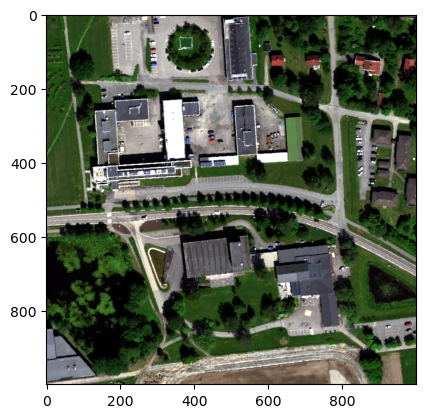

In [1]:
from spectral import *
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.pyplot import interactive

hyperim = np.load("nmbu.npy")

imshow(hyperim, (75, 46, 21), stretch=((0.02,0.98),(0.02,0.98),(0.02,0.98)))

#### Plotting with spectrum

In order to plot the with the spectrum as a function of wavelength we need to get the wavelength from the corresponding nmbu.hdr file. From there we may read the wavelength and use them for the plotting.

In [2]:
wavelength = envi.read_envi_header('nmbu.hdr')['wavelength']
ww = [float(i) for i in wavelength]
ww[0:10] # Just to see some of the wavelenghts

[404.70798,
 407.89667,
 411.08537,
 414.27405,
 417.46275,
 420.65144,
 423.84013,
 427.02882,
 430.21751,
 433.4062]

Now we need to selct pixels on the hyperspectral image for the following materials:

* grass
* asphalt 
* black roof 
* red roof
* solar panel
* water

and then we plot the spectrum of each material as a function of the wavelength.

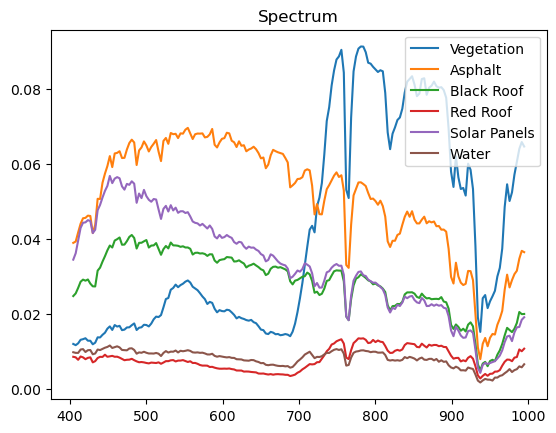

In [3]:
grass = np.array(hyperim[84, 140, :]).reshape(-1, 1)
asphalt = np.array(hyperim[68, 248, :]).reshape(-1, 1)
black_roof = np.array(hyperim[653, 670, :]).reshape(-1, 1)
red_roof = np.array(hyperim[147, 621, :]).reshape(-1, 1)
solar_panels = np.array(hyperim[406, 475, :]).reshape(-1, 1)
water = np.array(hyperim[718, 908, :]).reshape(-1, 1)

plt.plot(ww, grass, label="Vegetation")
plt.plot(ww, asphalt, label="Asphalt")
plt.plot(ww, black_roof, label="Black Roof")
plt.plot(ww, red_roof, label="Red Roof")
plt.plot(ww, solar_panels, label="Solar Panels")
plt.plot(ww, water, label="Water")

plt.title("Spectrum")
plt.legend()

#### Computing the NDVI 

In order to compute the NDVI (Normalized Difference Vegetation Index) we need to get band number for NIR (Near Infra Read). The NIR has a range between 750 nanometers (nm) and 2500 nm. And the red band which is located around between 645 nm and 750.

In [4]:
def get_band(wavelength, wave_val):
    diffs = [(i, abs(float(w) - wave_val)) for i, w in enumerate(wavelength)]
    closest = sorted(diffs, key=lambda t: t[1])[0]
    return closest[0]

bands = {
    'blue': get_band(wavelength, 440),
    'green': get_band(wavelength, 535),
    'red': get_band(wavelength, 645),
    'NIR': get_band(wavelength, 800),
}

print(f'The band numbers in order for us to compute the NDVI is NIR = {bands["NIR"]} and the Red = {bands["red"]}')

The band numbers in order for us to compute the NDVI is NIR = 124 and the Red = 75


Now that we have the band numbers we may use the following formula in order to compute the NDVI:

$$
NDVI = \frac{NIR-Red}{NIR+Red}
$$

Text(0.5, 1.0, 'NDVI')

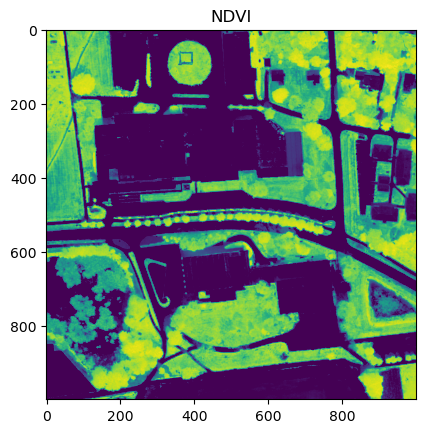

In [5]:
def NDVI(NIR, red):
    return np.divide((NIR-red), (NIR+red))

ndvi = NDVI(hyperim[:,:,bands['NIR']], hyperim[:,:,bands['red']])
plt.imshow(ndvi, vmin=0, vmax=0.9)
plt.title("NDVI")

#### Principal Component Analysis (PCA)

In order to carry out a PCA on our hyper spectral image we need the data using the PCA model. Which is a method used in order to simplify the hyperspectral image. From it we may extract useful information such as the first scores.

In [6]:
# Transform the image data using the PCA model
pca = principal_components(hyperim)
print(f"The number of principle components {pca.eigenvalues.size}")

The number of principle components 186


We see that there is 186 components in our image. In order make it more easier to work with the image we may reduce the image it by a fraction of 0.99. 

In [7]:
pc_099 = pca.reduce(fraction=0.99)
print(f"The number of principle components {pc_099.eigenvalues.size}")

The number of principle components 5


The image has now been reduced by a fraction of 0.99 and now we have 5 components to work with. Now we need to transform the reduced data and then we can display the score for each of the component from here on out.

Text(0.5, 1.0, 'Component 1 - Mostly non vegetation')

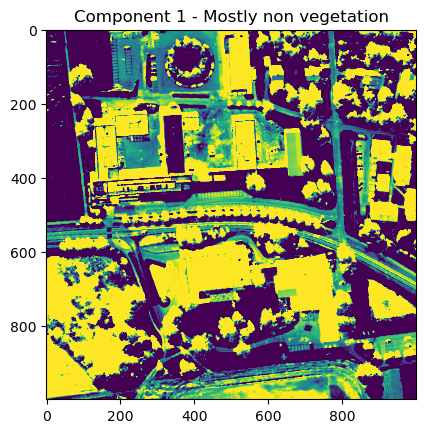

In [8]:
img_pc = pc_099.transform(hyperim) 

plt.imshow(img_pc[:, :, 0], vmin=-0.1, vmax=0.15) 
plt.title('Component 1 - Mostly non vegetation') 

The first component seems to mostly have high scores for non vegetation. However it is not that easily differentiable from all of the vegetation as the score is very high for some trees as well. 

Text(0.5, 1.0, 'Component 2 - Vegetation')

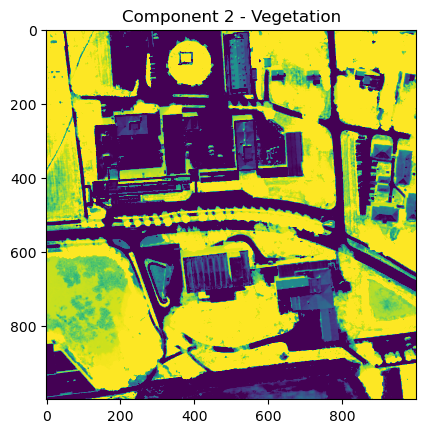

In [9]:
plt.imshow(img_pc[:, :, 1], vmin=-0.1, vmax=0.15) 
plt.title('Component 2 - Vegetation') 

This component seems to have a very sufficiently high score for vegetation for the most part. Apart from the fact that it also has a high score for the water at the boottom right this one can easily be used in order to distinguish between vegetation and non vegetation.

Text(0.5, 1.0, 'Component 3 - Noisy some roofs')

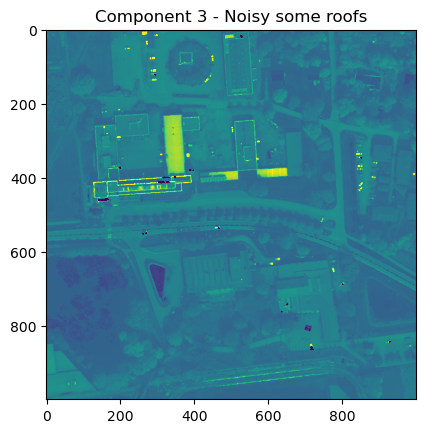

In [10]:
plt.imshow(img_pc[:, :, 2], vmin=-0.1, vmax=0.15) 
plt.title('Component 3 - Noisy some roofs') 

Here the data gets a bit noisy and there is not much to analyse here apart from the fact that some of the roofs have high scores.

Text(0.5, 1.0, 'Component 4 - More noise with darker roofs')

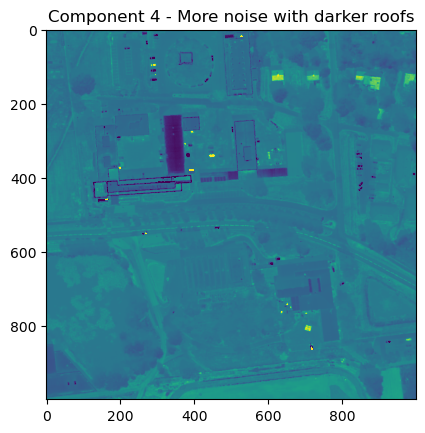

In [11]:
plt.imshow(img_pc[:, :, 3], vmin=-0.1, vmax=0.15) 
plt.title('Component 4 - More noise with darker roofs') 

The data in the fourth component has more noise than the previous one. Roofs which had high scores in the previous one has now been darkened.

Text(0.5, 1.0, 'Component 5 - Noisy')

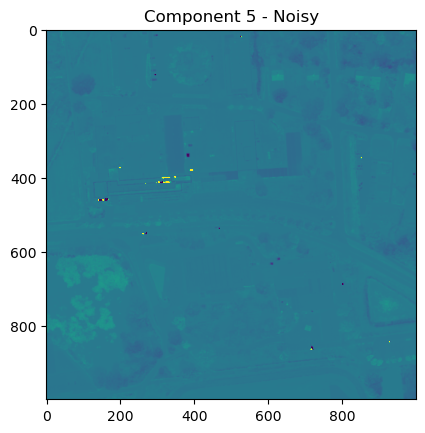

In [12]:
plt.imshow(img_pc[:, :, 4], vmin=-0.1, vmax=0.15) 
plt.title('Component 5 - Noisy') 

The data in the fifth component is the most noisy. Here there is not much to distinguish.

#### Loading plot 

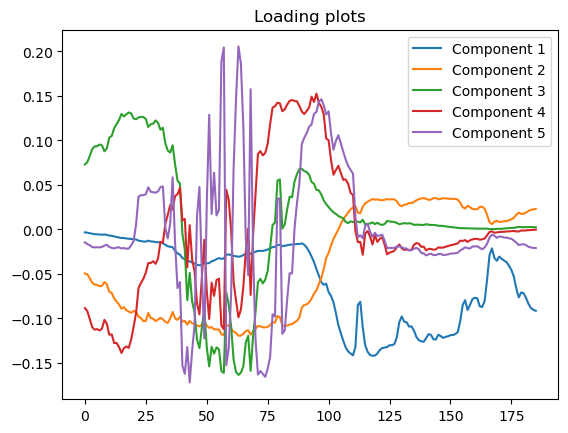

In [13]:
loadings = pc_099.eigenvectors 
 
plt.plot(loadings[:, [0]], label='Component 1') 
plt.plot(loadings[:, [1]], label='Component 2') 
plt.plot(loadings[:, [2]], label='Component 3') 
plt.plot(loadings[:, [3]], label='Component 4') 
plt.plot(loadings[:, [4]], label='Component 5')  

plt.title("Loading plots")
plt.legend()

The scores and the loading plot essentially tells us the same thing. If we look at the component number two in the loading plot we see that the graph goes up which indicates some sort of vegetation in the image. 

#### Eigenvalues plot

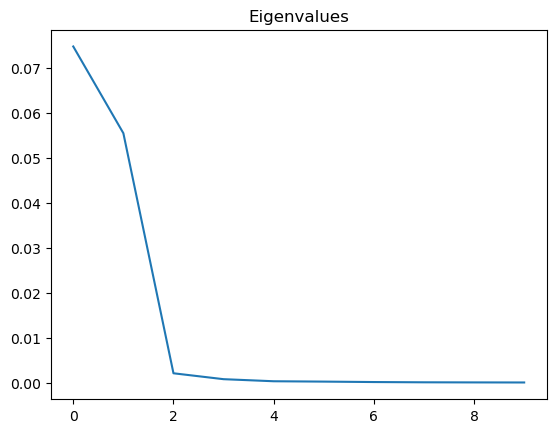

In [14]:
plt.title("Eigenvalues")
plt.plot(pca.eigenvalues[:10])

From the previously first 5 displayed scores we clearly saw that the first and the second score had the highest scores. In the first component the non vegetatation had the highest scores then in the second score the vegetation had the highest score. The third plot and the rest that followed afterwards carried alot of noise. which made it hard to distinguish between types in the image such as vegetation and non vegetation. This explains the break in the curve and eventual flattening of the graph.

#### Explained variance in the first two components

The explained variance is related to the eigenvalues. 

$$
Var = \frac{Eigenvalue}{\Sigma Eigenvalues}
$$

using this formula we may find the explained variance for the first two components to be:

In [15]:
sum_eig = sum(pca.eigenvalues)

explained_variance0 = pca.eigenvalues[0]/sum_eig # First component
explained_variance1 = pca.eigenvalues[1]/sum_eig

print(f'The explained variance for the first two components is {explained_variance0+explained_variance1}')

The explained variance for the first two components is 0.966930498776716


#### Bands needed in order to get 99.9 % of the explained variance

In [16]:
num_comp = 0
explained_99 = 0

for val in pca.eigenvalues:
    explained_99 += val/sum_eig
    num_comp += 1
    if explained_99 >= 0.999:
        break
        
explained_99
num_comp

print(f'The number of components needed in order to get a explained variance of {explained_99*100:.2f} is {num_comp}')

The number of components needed in order to get a explained variance of 99.90 is 31


#### Gaussian Maximum Likelihood Classification (GMLC)

In order to do a GMLC I will define the groundtruth which will be a matrix with the same dimensinality as that of the bands in the hyperspectral image. Then I will assign different pixel values to the groundtruth based on some of the areas hyperspectral image. The 5 classes to be classified are:

* Vegetation
* Asphalt
* Red roof
* Black roof
* Water

After selcting these areas I will create training for each of the material. And the I will use the Gaussian classifier in order to classify the diffrent areas which were specified.

Text(0.5, 1.0, 'Groundtruth')

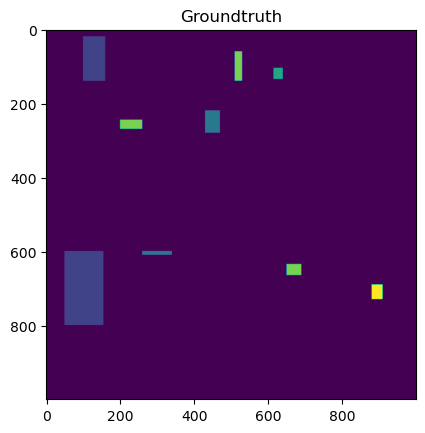

In [17]:
shape = hyperim.shape
groundtruth = np.zeros([shape[0], shape[1]])

groundtruth[20:140, 100:160] = 1. # vegetation
groundtruth[600:800, 50:155] = 1. # vegetation 2
groundtruth[220:280, 430:470] = 2. # asphalt
groundtruth[600:610, 260:340] = 2. # asphalt2
groundtruth[105:135, 615:640] = 3. # red roof
groundtruth[635:665, 650:690] = 4. # Black roof
groundtruth[245:270, 200:260] = 4. # Black roof 2
groundtruth[60:140, 510:530] = 4. # Black roof 3
groundtruth[690:730, 880:910] = 5. # water

plt.imshow(groundtruth)
plt.title("Groundtruth")

spectral:INFO: Setting min samples to 186


Processing...  0.0Processing... 20.0Processing... 40.0Processing... 60.0Processing... 80.0Processing... 100.Processing...done   


ImageView object:
  Interpolation       :  <default>

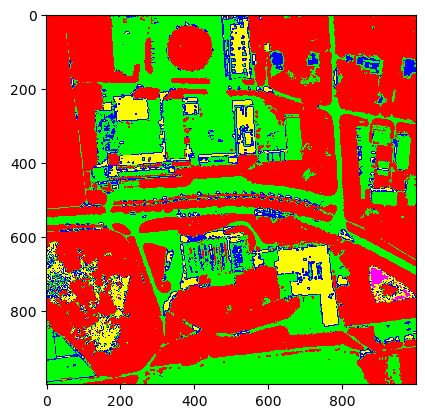

In [18]:
classes = create_training_classes(hyperim, groundtruth)
gmlc = GaussianClassifier(classes)
clmap = gmlc.classify_image(hyperim)
imshow(classes=clmap)

Here we see the following classification:

* Red (Vegetation)
* Green (Asphalt)
* Blue (Red roofs)
* Yellow (Some oofs)
* Pink (Water)

It is very hard for the classifier to distinguish between roofs and asphalts. It seems to do a very good job of classifying the vegtation apart from some of the noise that occurs from the shadows of the tree.

#### GMLC on stack of first 8 scores

In order to do a GMLC on the stack of the first 8 scores we simply just extract the first 8 scores and repeat the prcess. 

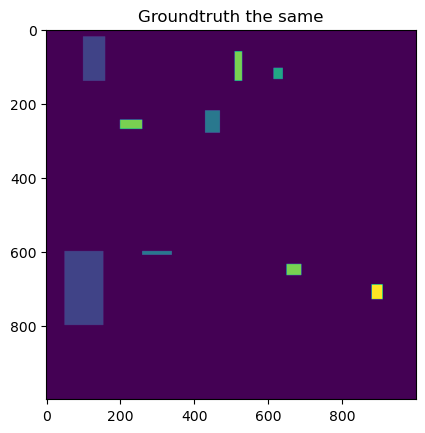

In [19]:
score = img_pc[:,:,:8]
shape = score.shape

groundtruth8 = np.zeros([shape[0], shape[1]])
groundtruth8[20:140, 100:160] = 1. # vegetation
groundtruth8[600:800, 50:155] = 1. # vegetation 2
groundtruth8[220:280, 430:470] = 2. # asphalt
groundtruth8[600:610, 260:340] = 2. # asphalt2
groundtruth8[105:135, 615:640] = 3. # red roof
groundtruth8[635:665, 650:690] = 4. # Black roof
groundtruth8[245:270, 200:260] = 4. # Black roof 2
groundtruth8[60:140, 510:530] = 4. # Black roof 3
groundtruth8[690:730, 880:910] = 5. # water

plt.title("Groundtruth the same")
plt.imshow(groundtruth8)

spectral:INFO: Setting min samples to 5


Processing...  0.0Processing... 20.0Processing... 40.0Processing... 60.0Processing... 80.0Processing... 100.Processing...done   


ImageView object:
  Interpolation       :  <default>

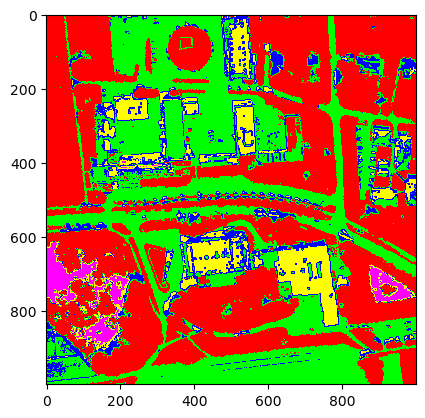

In [20]:
classes = create_training_classes(score, groundtruth8)
gmlc = GaussianClassifier(classes)
clmap = gmlc.classify_image(score)
imshow(classes=clmap)

Here the data is a little bit more noisy. We see that some of the classifications have deacreased such on the trees at the bottom left. Some of them are now considered to be water. 

#### Edge detection filter on vegetation

In [37]:
from skimage.filters import sobel

veg_class = classes[1] # Here I chose the vegetation class 

In [22]:
veg_edges = sobel(veg_class.image)
veg_edges.shape

(1000, 1000, 5)

ImageView object:
  Display bands       :  [0, 2.5, 4]
  Interpolation       :  <default>
  RGB data limits     :
    R: [0.0009813354805586535, 6.921288726999883]
    G: [7.308170783933551e-05, 8.68708170592054]
    B: [5.081144597416354e-06, 1.7580598803480811]

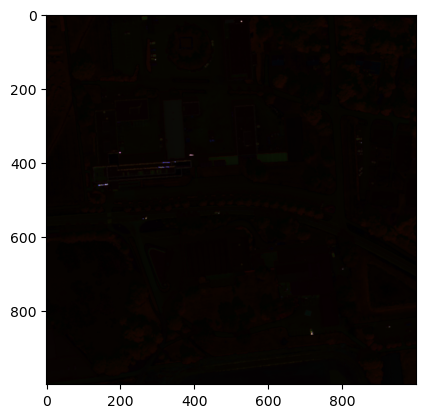

In [23]:
imshow(veg_edges)

In [38]:
veg_edges_ = veg_edges
veg_edges_.shape

(1000, 1000, 5)

In [41]:
ndvi_ = ndvi
ndvi_ = ndvi_[:,:,np.newaxis]
ndvi_.shape
veg_edges_overlay = np.where(veg_edges_<=ndvi_, veg_edges_, 0)
veg_edges_overlay.shape

(1000, 1000, 5)

ImageView object:
  Display bands       :  [0, 2.5, 4]
  Interpolation       :  <default>
  RGB data limits     :
    R: [0.0, 0.7576423284934239]
    G: [0.0, 0.3302446185025305]
    B: [0.0, 0.29643980368475153]

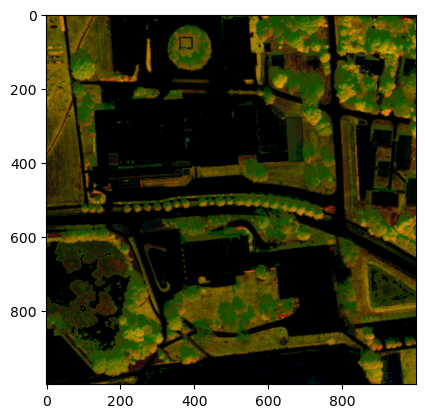

In [42]:
imshow(veg_edges_overlay)

I do not where my code fails. in this last part of the exrcise. It seems like the image produced is not the correct one. And I am not sure if the sobel filter which I have used, correctly worked on the image. I first extracted the vegetation class and then performed an edge detection filter on it, from there on I took the ndvi image and overlayed it over the vegetation class. This is the closest I could get to that which was shown in figure 6. 